# Explicit Time Integration Workbook: Cooking a Lobster
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

When cooking a Lobster, one can choose a traditional oven or using a pot with boiling water. Find out which method of cooking will cook the lobster faster assuming the lobster needs to cook at 100 C (374K) for 12 mins for a 1kg lobster.
Assumptions:
* The lobster remains at a uniform temperature.  This implies that the thermal conductivity of the lobster is “large”.  This is likely a poor assumption!
* The lobster is a cylinder with length L and radius r.
* The lobster’s mass remains constant with time (reasonable assumption)
* The heat capacity of the lobster is approximately that of water (questionable, but reasonable assumption).

Consider then a lobster of length $L = 0.3$ m, and a mass $m = 1$ kg. The Lobster is approximated as a cylinder of radius $r = 0.1$ m. The total surface area of the lobster is then $ A = 2\pi r L + 2 \pi r^2$. The heat capacity of the lobster is that of water, $c_p = 4200$ J/kg/K.

### Cooking in Boiling Water
Cooking in boiling water is akin to a convective heat transfer problem. The governing equation in this case for the temperature in the Lobster is
\begin{equation}
\frac{\text{d}T}{\text{d}t} = -\frac{h A}{m c_p} (T - T_\infty)
\end{equation}
whhere $h = 500$ J/m/m/s is the convective heat transfer coefficient and $T_\infty = 374$ is the temperature of boiling water (the surrounding temperature of the Lobster). So, we boil the water and put the Lobster in it and watch how the Lobster's temperature rises.

In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

In [2]:
def forward_euler(rhs, f0, tend, dt):
    # fn+1 = fn + dt*rhs
    nsteps = int(tend/dt)
    f = np.zeros(nsteps)
    f[0] = f0
    time = np.linspace(0, tend, nsteps)
    for n in np.arange(nsteps-1):
        f[n+1] = f[n] + dt * rhs(f[n], time[n])
    return time, f

In [3]:
def rhs_conv(T, time):
    h = 500 # W/(m2K)
    L = 0.3 # m
    r = 0.1 # m
    A = 2.0 * np.pi * r * L + 2.0 * np.pi * r * r # m2
    m = 1 # kg
    cp = 4200 # J/kg/K 
    Tinf = 374 # K (boiling temperature of water)
    rhs = - h * A / m / cp * (T - Tinf)
    return rhs

In [4]:
def rhs_rad(T, time):
    σ = 5.6704e-8 # W/m2/k4
    ϵ = 1.0
    m = 1.0 # kg
    cp = 4200 # J/kg/K
    L = 0.3 # m
    r = 0.1 # m
    A = 2.0 * np.pi * r * L + 2.0 * np.pi * r * r # m2
    Tinf = 400 # K
    rhs  = - σ * ϵ * A/m / cp*(T**4 - Tinf**4)
    return rhs

In [5]:
tend = 20 * 60
dt = 10
T0 = 311
time, Tconv = forward_euler(rhs_conv,T0,tend,dt)
time, Trad  = forward_euler(rhs_rad ,T0,tend,dt)

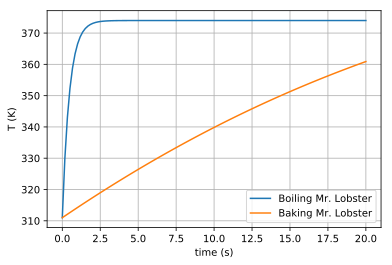

In [6]:
plt.plot(time/60,Tconv,label='Boiling Mr. Lobster')
plt.plot(time/60,Trad,label='Baking Mr. Lobster')
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.legend()
plt.grid()

# Using Python's `odeint`

In [7]:
from scipy.integrate import odeint

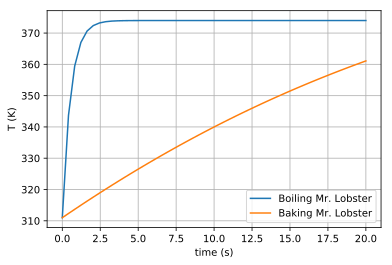

In [8]:
time = np.linspace(0,20*60)
T0 = 311
Tconv = odeint(rhs_conv,T0, time)
Trad = odeint(rhs_rad,T0, time)
plt.plot(time/60,Tconv,label='Boiling Mr. Lobster')
plt.plot(time/60,Trad,label='Baking Mr. Lobster')
plt.xlabel('time (s)')
plt.ylabel('T (K)')
plt.legend()
plt.grid()